In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [23]:
names = [
    "d1_track_starts",
    "d1_track_wins",
    "d1_track_losing",
    "d1_track_rate",
    "d1_cat_starts",
    "d1_cat_wins",
    "d1_cat_losing",
    "d1_cat_rate",
    "d1_track_speed",
    "d1_cat_speed",
    "d1_age",
    "d1_last_run",  
    "d2_track_starts",
    "d2_track_wins",
    "d2_track_losing",
    "d2_track_rate",
    "d2_cat_starts",
    "d2_cat_wins",
    "d2_cat_losing",
    "d2_cat_rate",
    "d2_track_speed",
    "d2_cat_speed",
    "d2_age",
    "d2_last_run",  
    "class"
]
races = pd.read_csv("data/avb.csv", names=names)

In [24]:
races.head()

,d1_track_starts,d1_track_wins,d1_track_losing,d1_track_rate,d1_cat_starts,d1_cat_wins,d1_cat_losing,d1_cat_rate,d1_track_speed,d1_cat_speed,...,d2_track_rate,d2_cat_starts,d2_cat_wins,d2_cat_losing,d2_cat_rate,d2_track_speed,d2_cat_speed,d2_age,d2_last_run,class
0,38,6,10,0.158,11,1,5,0.091,15.882,16.009,...,0.154,31,6,7,0.194,16.167,16.079,130,7,0
1,16,5,8,0.313,1,0,1,0.000,15.846,15.973,...,0.234,12,2,9,0.167,16.029,16.037,123,7,1
2,29,3,11,0.103,3,1,2,0.333,16.113,16.169,...,0.254,24,5,7,0.208,15.944,16.061,96,9,0
3,34,7,11,0.206,3,0,1,0.000,15.952,15.957,...,0.146,29,3,16,0.103,16.084,16.112,76,9,1
4,52,15,11,0.288,26,7,7,0.269,16.121,16.166,...,0.318,6,0,1,0.000,16.064,16.102,66,5,0


In [37]:
mean = (races["d1_track_speed"] + races["d2_track_speed"])/2
mean = mean.mean()

races["d1_speed"] = (races["d1_track_speed"] - races["d2_track_speed"] ) / (races["d1_track_speed"] * races["d1_track_rate"])
races["d2_speed"] = (races["d1_track_speed"] - races["d2_track_speed"] ) / (races["d2_track_speed"] * races["d2_track_rate"])
races.head()

,d1_track_starts,d1_track_wins,d1_track_losing,d1_track_rate,d1_cat_starts,d1_cat_wins,d1_cat_losing,d1_cat_rate,d1_track_speed,d1_cat_speed,...,d2_cat_wins,d2_cat_losing,d2_cat_rate,d2_track_speed,d2_cat_speed,d2_age,d2_last_run,class,d1_speed,d2_speed
0,38,6,10,0.158,11,1,5,0.091,15.882,16.009,...,6,7,0.194,16.167,16.079,130,7,0,-0.113575,-0.114471
1,16,5,8,0.313,1,0,1,0.000,15.846,15.973,...,2,9,0.167,16.029,16.037,123,7,1,-0.036897,-0.048790
2,29,3,11,0.103,3,1,2,0.333,16.113,16.169,...,5,7,0.208,15.944,16.061,96,9,0,0.101829,0.041731
3,34,7,11,0.206,3,0,1,0.000,15.952,15.957,...,3,16,0.103,16.084,16.112,76,9,1,-0.040169,-0.056212
4,52,15,11,0.288,26,7,7,0.269,16.121,16.166,...,0,1,0.000,16.064,16.102,66,5,0,0.012277,0.011158


/usr/local/lib/python2.7/dist-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python2.7/dist-packages/numpy/linalg/linalg.py:1876: RuntimeWarning: invalid value encountered in greater
  large = s > cutoff


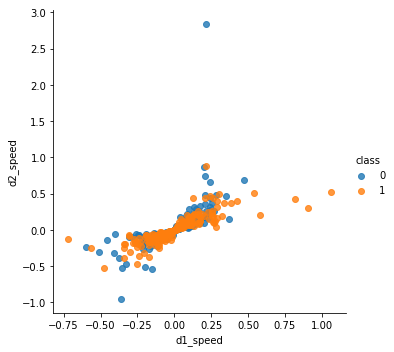

In [38]:
sns.lmplot(x="d1_speed", y="d2_speed", hue="class", data=races)